# Fractal Governance

## Table of Contents
<!-- START doctoc -->
<!-- END doctoc -->

## Introduction

[Datasets](data), [Jupyter notebooks](notebook/README.ipynb) and [Streamlit dashboards](https://share.streamlit.io/matt-langston/fractal_governance/main/fractal_governance/streamlit/genesis_fractal.py) for Fractal Governance

The motivation for this repository is to advance the understanding of Fractal Governance. The [datasets](data) from our [experimental apparatus](https://gofractally.com) will be of particular interest to data scientists, researchers and educators.

## What is Fractal Governance?

The goal of Fractal Governance is lofty: incentivize people to collaborate in the production of public goods and services that also eliminates corruption and graft in the process.

The principles of Fractal Governance are described in the book [More Equal Animals](https://moreequalanimals.com) by Daniel Larimer, and the technical specifications for how to implement Fractal Governance at scale is defined in the [fractally White Paper](https://fractally.com). This article presents an analysis of the initial results of the first group of people to govern themselves according to these principles and technical specifications.

These pioneers call their group [Genesis](https://gofractally.com/groups/7064857/feed) and refer to it as a Fractal. The Genesis members meet weekly to mine the inherent value of their collaboration to produce public goods and services and return that mined value, tokenized in units called *Respect*, directly back to its members through a governance process that naturally prevents corruption and graft. This incorruptibility is the defining feature of Fractal Governance.

Fractal Governance directly and consistently rewards individuals for their recent past contributions towards the creation of public goods and services that also avoids the formation of Pareto distributions due to corruption and graft found in all other known forms of governance. Gone are the days of rewarding collusion with illicit gains (such as currency) from dishonest behavior or other questionable means.

Analogous to Bitcoin's *Proof of Work* consensus algorithm which rewards people for transforming stored energy, in the form of electricity, into an incorruptible public ledger of account, a collaboration of people governed in a Fractal nature also uses a *Proof of Work* consensus algorithm to reward people for transforming stored energy, in the form of human collaboration, into public goods and services.

The fundamental difference between the two consensus algorithms is in how rewards are allocated. The Bitcoin model allocates rewards called BTC tokens to those who consume the most electricity most consistently. The Fractal model, on the other hand, allocates rewards called Respect tokens to those who contribute the most value most consistently, as judged by their peers.

The Bitcoin consensus algorithm is prone to corruption and graft because it rewards those that obtain the most consistent source of electricity by any means whatsoever, illicit or otherwise. The Fractal Governance consensus algorithm, on the other hand, prevents corruption and graft by eliminating opportunities for collusion.

The nature of how the rewards from the Bitcoin and Fractal Governance systems are recorded is similar in  that both systems use a blockchain for their public ledger of account.

You can [immediately explore the Genesis Fractal dataset](https://share.streamlit.io/matt-langston/fractal_governance/main/fractal_governance/streamlit/genesis_fractal.py) before returning here to continue your exploration. The dataset for this dashboard is curated by [Gregory Wexler](https://gofractally.com/members/10362727), [Joshua Seymour](https://gofractally.com/members/10361546) and [Matt Langston](https://gofractally.com/members/10426315).

## Getting Started for Data Scientists

I use my M1 MacBook with [MacPorts](https://www.macports.org) for the steps labeled **one time setup**.

### Step 1 (one time setup):

Install [python 3.9](https://docs.python.org/3.9/) and [pipenv](https://pipenv.pypa.io/en/latest/). I do this using MacPorts.

```bash
sudo port install python39
sudo port select --set python3 python39
sudo port select --set python python39
sudo port install pipenv
```

### Step 2 (one time setup):

Use pipenv to install the python dependencies. Run this command from the top-level directory of this git repository.

```bash
pipenv install --dev
```

### Step 3 (optional):

Run the Streamlit app. This will run the same dashboard as [Genesis Fractal dataset](https://share.streamlit.io/matt-langston/fractal_governance/main/fractal_governance/streamlit/genesis_fractal.py).

```bash
pipenv run streamlit run fractal_governance/streamlit/genesis_fractal.py
open http://localhost:8501
```

### Step 4 (optional):

Explore the Jupyter notebooks:

```bash
pipenv run jupyter lab
```

### Step 5:

Start exploring our datasets, models and simulations. What follows is an example analysis of the Genesis fractal's dataset to inspire your own explorations.

## Example Analysis of the Genesis Fractal

### Setup

In [1]:
# 3rd party dependencies
import matplotlib.pyplot as plt

# 2nd party dependencies
import fractal_governance.dataset
import fractal_governance.plots

from fractal_governance.util import GitHubMarkdownDataFrame

### A Dataset of Multiple pandas DataFrames

Read the Genesis fractal's dataset into a `Dataset` object consisting of multiple convenient pandas DataFrames.

In [2]:
dataset = fractal_governance.dataset.Dataset.from_csv('../data/genesis-weekly_rank.csv')

List the attributes of this `Dataset` object to see what properties and methods we have to work with.

In [3]:
[attribute for attribute in dir(dataset) if not attribute.startswith('__')]

['_get_new_member_filter_for_meeting_id',
 'attendance_consistency_stats',
 'attendance_stats',
 'df',
 'df_member_attendance_new_and_returning_by_meeting',
 'df_member_leader_board',
 'df_member_rank_by_attendance_count',
 'df_member_respect_new_and_returning_by_meeting',
 'df_member_summary_stats_by_member_id',
 'df_team_leader_board',
 'df_team_representation_by_date',
 'df_team_respect_by_meeting_date',
 'from_csv',
 'get_new_member_dataframe_for_meeting_id',
 'get_returning_member_dataframe_for_meeting_id',
 'last_meeting_date',
 'team_representation_stats',
 'total_meetings',
 'total_member_respect',
 'total_respect',
 'total_team_respect',
 'total_unique_members']

The curated raw data from the Genesis weekly consensus meetings is a pandas DataFrame accessed through the `df` property.

The other properties beginning with the prefix `df_` are derived DataFrames from the raw data in the `df` DataFrame.

All other properties, `total_respect` for example, are interesting values calculated from the various DataFrames.

Let's have a look at the raw data `df` DataFrame from which everything else is derived.

In [4]:
GitHubMarkdownDataFrame(dataset.df)

,Index,MemberID,Name,MeetingID,Group,Rank,TeamID,TeamName,MeetingDate,Respect
0,1,00,Chace Eskimo,2,1,4,NaN,NaN,2022-03-05,8
1,2,01,Debraj Ghosh,2,2,3,NaN,NaN,2022-03-05,5
2,3,02,Nick Shock,2,2,2,NaN,NaN,2022-03-05,3
3,4,03,Jimmy Lee,2,3,2,NaN,NaN,2022-03-05,3
4,5,04,Abdulsalam Ridwa,2,6,1,NaN,NaN,2022-03-05,2
...,...,...,...,...,...,...,...,...,...,...
389,390,dphillippi,Duane Phillippi,12,6,5,NaN,NaN,2022-05-21,13
390,391,tmess,Toby Messier,12,6,4,3.0,Fractally in Orbit,2022-05-21,8
391,392,shakhruz,Shakhruz Ashirov,12,6,3,2.0,EOS Translation Foundation,2022-05-21,5
392,393,drwu,Doug Wu,12,6,2,2.0,EOS Translation Foundation,2022-05-21,3


In [5]:
dataset.total_meetings

12

In [6]:
dataset.total_unique_members

99

### DataFrame of Member Leaderboard

Inspect the first few rows of the member leaderboard DataFrame based on accumulated consensus Rank.

In [7]:
GitHubMarkdownDataFrame(dataset.df_member_leader_board.head(10))

,MemberID,Name,AccumulatedRank,AccumulatedRespect,AttendanceCount
1,dan,Daniel Larimer,64,215,11
2,dansingjoy,Dan Singjoy,63,189,12
3,wildwex,Gregory Wexler,60,191,11
4,jseymour,Joshua Seymour,54,143,12
5,novacryptollc,Patrick Bernard Schmid,46,122,10
6,hachtu,Mark Scheer,45,126,9
7,pnc,Pascal Ngu Cho,42,89,11
8,douglasjames,Douglas Butner,41,113,11
9,jaytaylor-node,Jay Taylor,40,80,12
10,dphillippi,Duane Phillippi,40,88,11


### A Plots Object of Multiple Visualizations

Create a `Plots` object that contains interesting visualizations used throughput the remainder of our example analysis.

In [8]:
plots = fractal_governance.plots.Plots.from_dataset(dataset)

List the attributes of this `Plots` object to see what properties and methods we have to work with.

In [9]:
[attribute for attribute in dir(plots) if not attribute.startswith('__')]

['accumulated_member_respect_vs_time',
 'accumulated_member_respect_vs_time_stacked',
 'accumulated_team_respect_vs_time',
 'accumulated_team_respect_vs_time_stacked',
 'attendance_consistency_histogram',
 'attendance_count_vs_rank',
 'attendance_vs_time',
 'attendance_vs_time_stacked',
 'dataset',
 'from_csv',
 'from_dataset',
 'team_representation_vs_time']

### Plot of Attendance vs Time

Plot the attendance vs time for each weekly consensus meeting.

The plot demonstrates that a relatively steady state has been reached where a core group of dedicated members is mixed with a steady stream of new participants as interest in Fractal Governance grows.

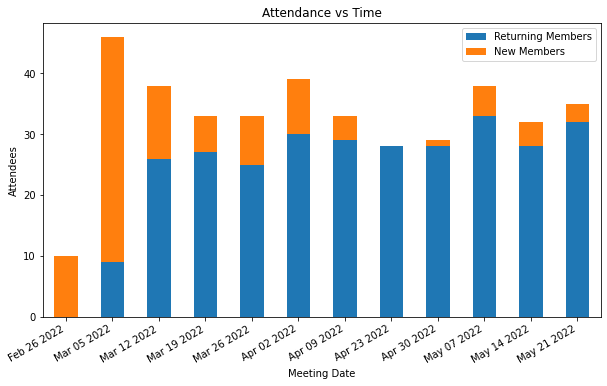

In [10]:
plots.attendance_vs_time_stacked
plt.show()

### DataFrame of New and Returning Member Attendance vs Time

Inspect the DataFrame of the attendance counts of new members vs returning members for each weekly consensus meeting.

In [11]:
GitHubMarkdownDataFrame(dataset.df_member_attendance_new_and_returning_by_meeting)

,MeetingDate,MeetingID,NewMemberCount,ReturningMemberCount
0,2022-02-26,1,10,0
1,2022-03-05,2,37,9
2,2022-03-12,3,12,26
3,2022-03-19,4,6,27
4,2022-03-26,5,8,25
5,2022-04-02,6,9,30
6,2022-04-09,7,4,29
7,2022-04-23,8,0,28
8,2022-04-30,9,1,28
9,2022-05-07,10,5,33


### Average Attendees per Meeting

The average number of attendees per meeting.

In [12]:
dataset.attendance_stats

Statistics(mean=32.83, standard_deviation=8.68)

### Plot of Consistency of Attendance

Plot the consistency of attendance for the weekly consensus meetings. This is the total number of meetings attended by a unique member. The first bin counts the number of people who have only attended one weekly consensus meeting.

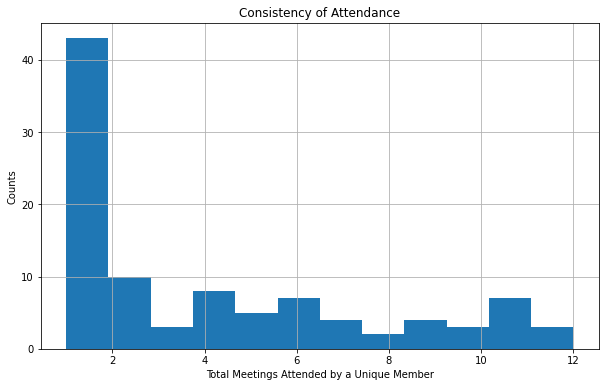

In [13]:
plots.attendance_consistency_histogram
plt.show()

### Average Consistency of Attendance

The average number of meetings attended by a unique member.

In [14]:
dataset.attendance_consistency_stats

Statistics(mean=3.98, standard_deviation=3.61)

### DataFrame of New and Returning Member Respect Mined (or Earned) vs Time

Inspect the DataFrame for the total amount of member Respect mined (or earned) for each weekly consensus meeting.

In [15]:
GitHubMarkdownDataFrame(dataset.df_member_respect_new_and_returning_by_meeting)

,MeetingDate,MeetingID,AccumulatedRespect,AccumulatedRespectNewMember,AccumulatedRespectReturningMember
0,2022-02-26,1,99,99,0
1,2022-03-05,2,412,296,116
2,2022-03-12,3,356,76,280
3,2022-03-19,4,306,49,257
4,2022-03-26,5,306,66,240
5,2022-04-02,6,358,44,314
6,2022-04-09,7,306,14,292
7,2022-04-23,8,256,0,256
8,2022-04-30,9,258,2,256
9,2022-05-07,10,356,45,311


### Plot of Accumulated New and Returning Member Respect vs Time

Plot the accumulated member Respect of the Genesis fractal vs time.

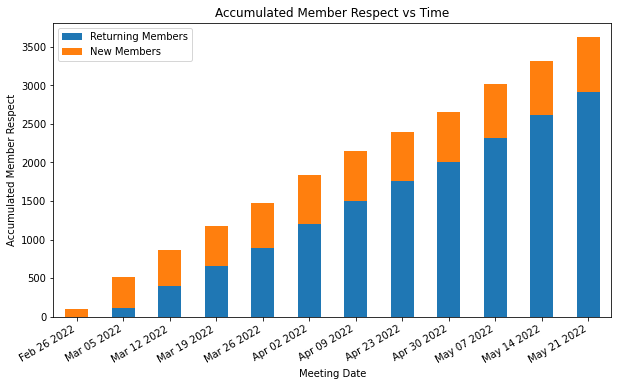

In [16]:
plots.accumulated_member_respect_vs_time_stacked
plt.show()

### Total Accumulated Member Respect

The total accumulated member Respect integrated over all members.

In [17]:
dataset.total_member_respect

3627

### DataFrame of Team Respect Mined (or Earned) vs Time

Inspect the DataFrame for the total amount of team Respect mined (or earned) for each weekly consensus meeting.

In [18]:
GitHubMarkdownDataFrame(dataset.df_team_respect_by_meeting_date)

,TeamName,MeetingDate,AccumulatedRespect
0,EOS Translation Foundation,2022-04-23,21
1,EOS Translation Foundation,2022-04-30,23
2,EOS Translation Foundation,2022-05-07,21
3,EOS Translation Foundation,2022-05-14,26
4,EOS Translation Foundation,2022-05-21,34
5,Fractally in Orbit,2022-05-14,29
6,Fractally in Orbit,2022-05-21,16
7,Team fractally,2022-03-26,118
8,Team fractally,2022-04-02,89
9,Team fractally,2022-04-09,89


### Plot of Accumulated Team Respect vs Time

Plot the accumulated team Respect of the Genesis fractal teams vs time.

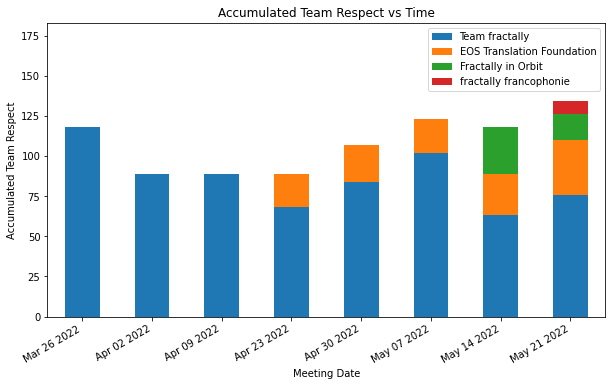

In [19]:
plots.accumulated_team_respect_vs_time_stacked
plt.show()

### Total Accumulated Team Respect

The total accumulated team Respect integrated over all teams.

In [20]:
dataset.total_team_respect

867

### DataFrame of Team Leaderboard

The team leaderboard shows the the total accumulated team Respect for each team.

In [21]:
GitHubMarkdownDataFrame(dataset.df_team_leader_board)

,AccumulatedRespect
TeamName,
Team fractally,689
EOS Translation Foundation,125
Fractally in Orbit,45
fractally francophonie,8


### Plot of Team Representation

Plot the fraction of members representing teams over time.

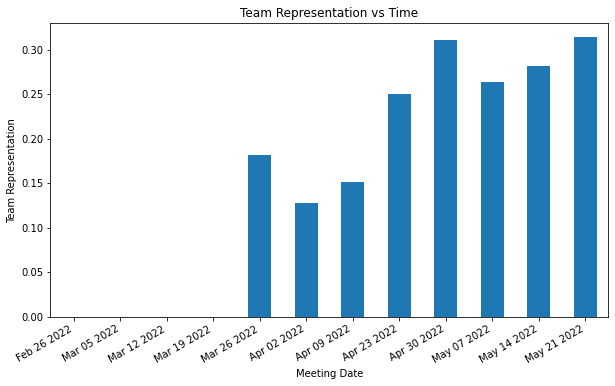

In [22]:
plots.team_representation_vs_time
plt.show()

### Average Team Representation per Meeting

The average team representation per meeting. This is the number of members in attendance that are members of a team divided by the total number of members in attendance.

In [23]:
dataset.team_representation_stats

Statistics(mean=0.24, standard_deviation=0.07)

### DataFrame of Consensus Rank vs Attendance

Inspect the DataFrame for the accumulated consensus Rank of contributions as discerned by the Genesis fractal for each member.

In [24]:
GitHubMarkdownDataFrame(dataset.df_member_summary_stats_by_member_id)

,AttendanceCount,AccumulatedRank,AccumulatedRespect,Mean,StandardDeviation
MemberID,,,,,
00,1,4,8,4.000000,NaN
01,1,3,5,3.000000,NaN
02,1,2,3,2.000000,NaN
03,1,2,3,2.000000,NaN
04,1,1,2,1.000000,NaN
...,...,...,...,...,...
wakeupjohnny,1,1,2,1.000000,NaN
wigglesthe3r,2,7,13,3.500000,0.707107
wildwex,11,60,191,5.454545,0.934199


### DataFrame of Accumulated Consensus Rank vs Attendance

Inspect the DataFrame for the mean accumulated consensus Rank based on meeting attendance.

In [25]:
GitHubMarkdownDataFrame(dataset.df_member_rank_by_attendance_count)

,AttendanceCount,Mean,StandardDeviation
0,1,2.581395,1.331533
1,2,3.500000,1.905670
2,3,3.222222,1.855921
3,4,3.375000,1.539795
4,5,3.160000,1.572683
5,6,4.380952,1.637255
6,7,3.750000,1.776910
7,8,2.875000,1.147461
8,9,3.611111,1.572583
9,10,4.033333,1.129032


The mean accumulated consensus Rank is strongly correlated with meeting attendance.

In [26]:
GitHubMarkdownDataFrame(dataset.df_member_rank_by_attendance_count[['AttendanceCount', 'Mean']].corr())

,AttendanceCount,Mean
AttendanceCount,1.00000,0.67134
Mean,0.67134,1.00000


### Plot of Attendance Consistency vs Rank

Based on this strong correlation, plot the change in Rank vs the number of meetings attended.

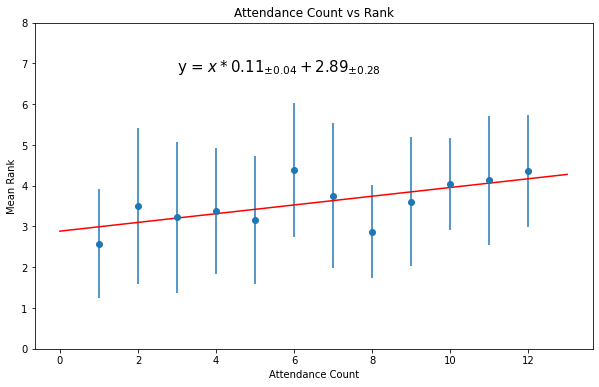

In [27]:
plots.attendance_count_vs_rank
plt.show()

As the plot shows, on average members rank higher in subsequent weeks based on the number of past weekly consensus meetings they have participated in. Possible reasons for this phenomena include:

* Over time members learn what their fellow members value and come into alignment with those values.
* Over time members begin to imitate their higher ranked colleagues from watching how they conduct themselves.
* There is a self-selection process going on. This is an interesting idea for further analysis.

## Getting Started for Software Engineers

I use my M1 MacBook for software engineering, and the following steps reflect that architecture.

### Step 1 (one time setup):

Install [bazel](https://bazel.build) on your `PATH`. I do this using [bazelisk](https://github.com/bazelbuild/bazelisk). 

```bash
curl -LJO https://github.com/bazelbuild/bazelisk/releases/download/v1.11.0/bazelisk-darwin-arm64
chmod a+x bazelisk-darwin-arm64
ln -s bazelisk-darwin-arm64 bazel
```

### Step 2 (one time setup):

Install [buildifier](https://github.com/bazelbuild/buildtools/blob/master/buildifier/README.md) on your `PATH`.

You need `buildifier` for linting and formatting the bazel files [WORKSPACE](WORKSPACE) and [BUILD](BUILD) if you change them. 

```bash
curl -LJO https://github.com/bazelbuild/buildtools/releases/download/5.1.0/buildifier-darwin-arm64
chmod a+x buildifier-darwin-arm64
ln -s buildifier-darwin-arm64 buildifier
```

### Step 3 (one time setup):

Install [Xcode from the App Store](https://apps.apple.com/us/app/xcode/id497799835?mt=12).


### Step 4 (one time setup; optional):

I needed to create the following symlink on my M1 MacBook.

```base
pushd /Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/
sudo ln -s MacOSX.sdk MacOSX12.1.sdk
popd
```

This symlink was required to work around this error during `bazel test //...`.

> Compiling with an SDK that doesn't seem to exist: /Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX12.1.sdk
> Please check your Xcode installation

### Step 5:

Clone this repo and build all targets.

```bash
bazel build //...
```

### Step 6:

Run all unit tests.

```bash
bazel test //...
```

## Notes for Contributors

You are encouraged to collaborate and contribute to this project. Please ask questions and share your insights and discoveries in the [Modeling and Simulation](https://gofractally.com/groups/7064857/topics/7623063) topic of [gofractally.com](https://gofractally.com).

Please perform the following procedures before opening a pull request for this project. These manual procedures are temporary and will eventually be incorporated into bazel targets and enforced through CI.

### Python Dependencies

The source of truth for this project's python dependencies is the [Pipfile](Pipfile) file. The following three files are derived from this Pipfile file and must be regenerated after changing it:

1. [Pipfile.lock](Pipfile.lock)
2. [requirements.txt](requirements.txt)
3. [requirements-dev.txt](requirements-dev.txt)

This project's bazel repository, defined in [WORKSPACE](WORKSPACE), depends on [requirements.txt](requirements.txt) to define the python dependencies for bazel targets throughout this project.

The [Streamlit app](fractal_governance/streamlit/genesis_fractal.py) also depends on [requirements.txt](requirements.txt) to define its runtime python dependencies.

Developer tools, like `jupyterlab` code formatters and linters, depend on [requirements-dev.txt](requirements-dev.txt) to define its runtime python dependencies.

The following procedure is how I update these three derived files after changing the [Pipfile](Pipfile) file. You will need `pipenv` for this step, so if you don't have this development tool installed then you may want to follow the steps labeled **one time setup** in [Getting Started for Data Scientists](#getting-started-for-data-scientists).

```
pipenv install --dev
pipenv lock -r > requirements.txt
pipenv lock --dev -r > requirements-dev.txt
```

Check that the [README.ipynb](notebook/README.ipynb) notebook and [Streamlit app](fractal_governance/streamlit/genesis_fractal.py) still run by following the procedure in [Getting Started for Data Scientists](#getting-started-for-data-scientists), and that the unit tests still pass by following the procedure in [Getting Started for Software Engineers](#getting-started-for-software-engineers).

### Format and Lint Python Source Code

Please use the following procedure to format and lint the python source code after making any changes.

```bash
find fractal_governance test -name '*.py' -print0 | xargs -0 pipenv run yapf -i
find fractal_governance test -name '*.py' -print0 | xargs -0 pipenv run pylint
```

### Format and Lint Bazel Source Files

Please use the following procedure to format and lint the bazel source files.

```bash
find . -type f -name "BUILD" -or -name "WORKSPACE" -print0 | xargs -0 buildifier -lint fix
```

### Updating README.md

The source of truth for this project's [README.md](README.md) file is the [README.ipynb](notebook/README.ipynb) notebook. The following procedure is how I update the [README.md](README.md) file after changing the [README.ipynb](notebook/README.ipynb) notebook.

#### Step 1 (one time setup):
```bash
pipenv run nodeenv -p
pipenv run npm install -g doctoc
```

#### Step 2:
```bash
rm -rf README_files
pipenv run jupyter nbconvert --to markdown notebook/README.ipynb --output-dir .
pipenv run doctoc README.md
```

## Resources

Resources to learn more about Fractal Governance:


- [fractally White Paper](https://fractally.com)
- [More Equal Animals](https://moreequalanimals.com) by Daniel Larimer
- [First Results from the Fractal Governance Experiments](https://hive.blog/fractally/@mattlangston/first-results-from-the-fractal-governance-experiments)
- [Genesis Fractal Dashboard](https://share.streamlit.io/matt-langston/fractal_governance/main/fractal_governance/streamlit/genesis_fractal.py)
- [Modeling and Simulation](https://gofractally.com/groups/7064857/topics/7623063) topic on [gofractally.com](https://gofractally.com)

If you contribute new Jupyter notebooks then please place them in the [notebook](notebook) directory.

## License

This project is licensed under the terms of the MIT license as defined in the [LICENSE](LICENSE) file.